 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [3]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline
Path.cwd()


WindowsPath('L:/Bootbamp Work/GitHub/cu-nyc-virt-fin-pt-03-2021-u-c/02-Homework/04-Pandas/Instructions/Starter_Code')

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [18]:
# Reading whale returns
whale_path=Path("./Resources/whale_returns.csv")
whale_df=pd.read_csv(whale_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
...                               ...                 ...   
2019-04-25                  -0.000285           -0.001291   
2019-04-26                   0.008149            0.009162   
2019-04-29                   0.001254            0.002719   
2019-04-30                  -0.001295           -0.002211   
2019-05-01                  -0.005847           -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098  
...                                 ...                     ...  
2019-04-25                    -0.005153                0.004848  
2019-04-26                     0.012355                0.010434  
2019-04-29                     0.006251                0.005223  
2019-04-30                    -0.000259               -0.003702  
2019-05-01                    -0.007936               -0.007833  

[1060 rows x 4 columns]

In [3]:
# Count nulls
whale_df.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
...                               ...                 ...   
2019-04-25                  -0.000285           -0.001291   
2019-04-26                   0.008149            0.009162   
2019-04-29                   0.001254            0.002719   
2019-04-30                  -0.001295           -0.002211   
2019-05-01                  -0.005847           -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098  
2015-03-09                     0.005843               -0.001652  
...                                 ...                     ...  
2019-04-25                    -0.005153                0.004848  
2019-04-26                     0.012355                0.010434  
2019-04-29                     0.006251                0.005223  
2019-04-30                    -0.000259               -0.003702  
2019-05-01                    -0.007936               -0.007833  

[1059 rows x 4 columns]

#Rename Whale Return Columns

In [5]:
whale_df.columns=["SOROS","PAULSON","TIGER","BERKSHIRE"]
whale_df

SOROS   PAULSON     TIGER  BERKSHIRE
Date                                               
2015-03-03 -0.001266 -0.004981 -0.000496  -0.006569
2015-03-04  0.002230  0.003241 -0.002534   0.004213
2015-03-05  0.004016  0.004076  0.002355   0.006726
2015-03-06 -0.007905 -0.003574 -0.008481  -0.013098
2015-03-09  0.000582  0.004225  0.005843  -0.001652
...              ...       ...       ...        ...
2019-04-25 -0.000285 -0.001291 -0.005153   0.004848
2019-04-26  0.008149  0.009162  0.012355   0.010434
2019-04-29  0.001254  0.002719  0.006251   0.005223
2019-04-30 -0.001295 -0.002211 -0.000259  -0.003702
2019-05-01 -0.005847 -0.001341 -0.007936  -0.007833

[1059 rows x 4 columns]

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [17]:
# Reading algorithmic returns
algo_path=Path("./Resources/algo_returns.csv")
algo_df=pd.read_csv(algo_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df


Algo 1    Algo 2
Date                          
2014-05-28  0.001745       NaN
2014-05-29  0.003978       NaN
2014-05-30  0.004464       NaN
2014-06-02  0.005692       NaN
2014-06-03  0.005292       NaN
...              ...       ...
2019-04-25  0.000682 -0.007247
2019-04-26  0.002981  0.005256
2019-04-29  0.005208  0.002829
2019-04-30 -0.002944 -0.001570
2019-05-01  0.000094 -0.007358

[1241 rows x 2 columns]

In [7]:
# Count nulls
algo_df.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df

Algo 1    Algo 2
Date                          
2014-06-05  0.004062  0.013285
2014-06-06  0.001857  0.008284
2014-06-09 -0.005012  0.005668
2014-06-10  0.004406 -0.000735
2014-06-11  0.004760 -0.003761
...              ...       ...
2019-04-25  0.000682 -0.007247
2019-04-26  0.002981  0.005256
2019-04-29  0.005208  0.002829
2019-04-30 -0.002944 -0.001570
2019-05-01  0.000094 -0.007358

[1235 rows x 2 columns]

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [16]:
# Reading S&P 500 Closing Prices

sp500_path=Path("./Resources/sp500_history.csv")
sp500_df= pd.read_csv(sp500_path)
sp500_df["Date"]=pd.to_datetime(sp500_df["Date"])
sp500_df.set_index("Date", inplace = True)
sp500_df["Close"]=sp500_df["Close"].str.replace("$"," ")
sp500_df.sort_index(ascending=True,inplace=True)

sp500_df


C:\Users\chand\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  import sys


Close
Date                
2012-10-01   1444.49
2012-10-02   1445.75
2012-10-03   1450.99
2012-10-04   1461.40
2012-10-05   1460.93
...              ...
2019-04-16   2907.06
2019-04-17   2900.45
2019-04-18   2905.03
2019-04-22   2907.97
2019-04-23   2933.68

[1649 rows x 1 columns]

In [10]:
# Check Data Types

sp500_df.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
sp500_df["Close"]=sp500_df["Close"].astype('float')

sp500_df.dtypes

Close    float64
dtype: object

In [12]:
# Calculate Daily Returns
sp500_drt_df=sp500_df.pct_change()
sp500_drt_df.head()

Close
Date                
2012-10-01       NaN
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322

In [13]:
# Drop nulls
sp500_drt_df=sp500_drt_df.dropna()
sp500_drt_df.head()

Close
Date                
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322
2012-10-08 -0.003457

In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp500_drt_df.columns=["S&P500"]
sp500_drt_df.head()

S&P500
Date                
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322
2012-10-08 -0.003457

## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df=pd.concat([whale_df,algo_df,sp500_drt_df],axis="columns",join="inner")
combined_df.head()

SOROS   PAULSON     TIGER  BERKSHIRE    Algo 1    Algo 2  \
Date                                                                      
2015-03-03 -0.001266 -0.004981 -0.000496  -0.006569 -0.001942 -0.000949   
2015-03-04  0.002230  0.003241 -0.002534   0.004213 -0.008589  0.002416   
2015-03-05  0.004016  0.004076  0.002355   0.006726 -0.000955  0.004323   
2015-03-06 -0.007905 -0.003574 -0.008481  -0.013098 -0.004957 -0.011460   
2015-03-09  0.000582  0.004225  0.005843  -0.001652 -0.005447  0.001303   

              S&P500  
Date                  
2015-03-03 -0.004539  
2015-03-04 -0.004389  
2015-03-05  0.001196  
2015-03-06 -0.014174  
2015-03-09  0.003944

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

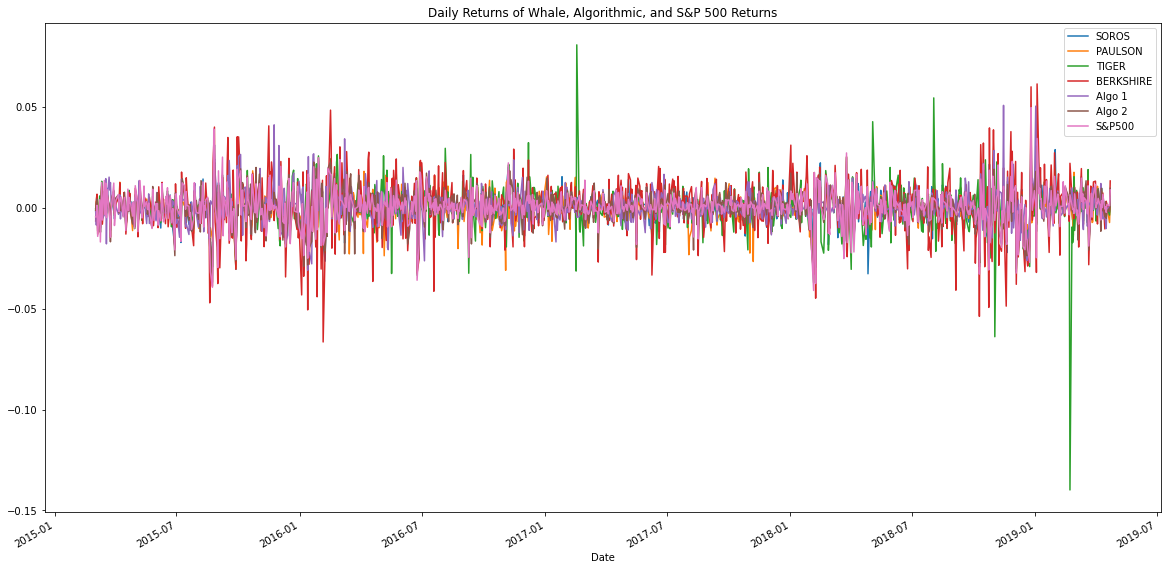

In [16]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(20,10), title="Daily Returns of Whale, Algorithmic, and S&P 500 Returns")
combined_df.plot

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns of Whale, Algorithmic, and S&P 500 Returns'}, xlabel='Date'>

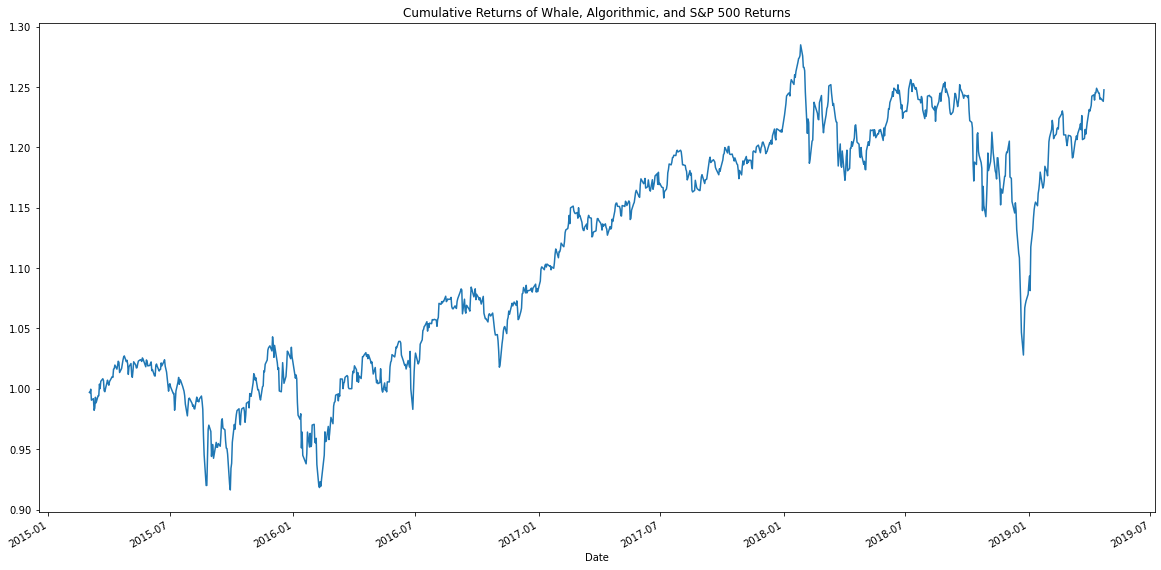

In [17]:
# Calculate cumulative returns of all portfolios
weights=[(1/7),(1/7),(1/7),(1/7),(1/7),(1/7),(1-(1/7)*6)]
portfolio_returns=combined_df.dot(weights)                                  
cumulative_returns=(1+portfolio_returns).cumprod()


# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10), title="Cumulative Returns of Whale, Algorithmic, and S&P 500 Returns")


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Combined Returns of Whale, Algorithmic, and S&P 500 Returns'}>

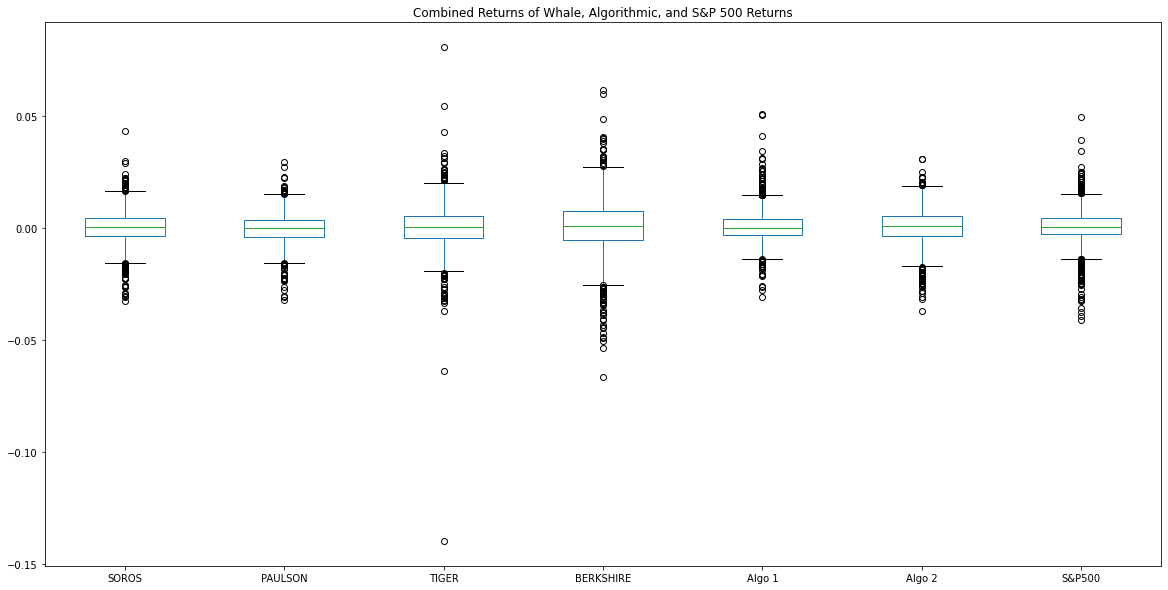

In [18]:
# Box plot to visually show risk
combined_df.plot.box(figsize=(20,10),title="Combined Returns of Whale, Algorithmic, and S&P 500 Returns")

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios

daily_std=combined_df.std()
daily_std=daily_std.sort_values(ascending=False)
daily_std




BERKSHIRE    0.012919
TIGER        0.010894
S&P500       0.008554
Algo 2       0.008342
SOROS        0.007895
Algo 1       0.007620
PAULSON      0.007023
dtype: float64

### Determine which portfolios are riskier than the S&P 500

### Calculate  the daily standard deviation of S&P 500
 _S&P500 Daily return Std =0.008554_

### Determine which portfolios are riskier than the S&P 500
 _BERKSHIRE HATHAWAY INC & TIGER GLOBAL MANAGEMENT LLC are riskier investments.
 than S&P500  as their Slandered Deviation are higher than S&P 5000_



### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
annualised_std=daily_std*np.sqrt(252)
annualised_std

BERKSHIRE    0.205077
TIGER        0.172936
S&P500       0.135786
Algo 2       0.132430
SOROS        0.125335
Algo 1       0.120967
PAULSON      0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Combined rolling Std. of Whale, Algorithmic, and S&P 500 Returns'}, xlabel='Date'>

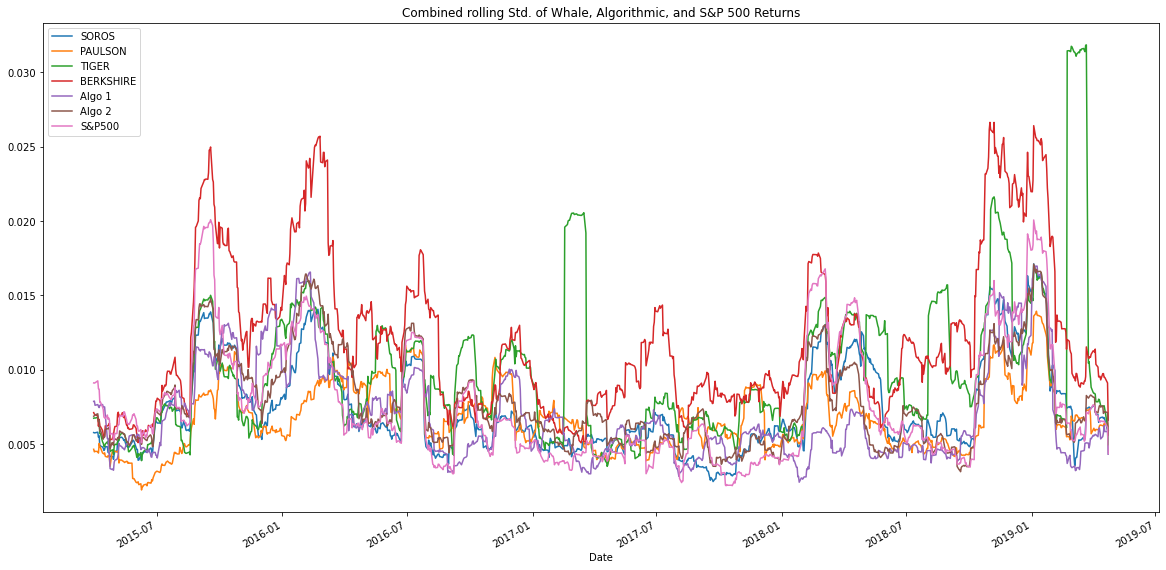

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_rolling_std=combined_df.rolling(window=21,center=False, axis=0).std()


# Plot the rolling standard deviation
combined_rolling_std.plot(figsize=(20,10),title="Combined rolling Std. of Whale, Algorithmic, and S&P 500 Returns")


### Calculate and plot the correlation

In [22]:
# Calculate the correlation
correlation_matrix=combined_df.corr()


# Display de correlation matrix
correlation_matrix


SOROS   PAULSON     TIGER  BERKSHIRE    Algo 1    Algo 2  \
SOROS      1.000000  0.699914  0.561243   0.754360  0.321211  0.826873   
PAULSON    0.699914  1.000000  0.434479   0.545623  0.268840  0.678152   
TIGER      0.561243  0.434479  1.000000   0.424423  0.164387  0.507414   
BERKSHIRE  0.754360  0.545623  0.424423   1.000000  0.292033  0.688082   
Algo 1     0.321211  0.268840  0.164387   0.292033  1.000000  0.288243   
Algo 2     0.826873  0.678152  0.507414   0.688082  0.288243  1.000000   
S&P500     0.837864  0.669732  0.623946   0.751371  0.279494  0.858764   

             S&P500  
SOROS      0.837864  
PAULSON    0.669732  
TIGER      0.623946  
BERKSHIRE  0.751371  
Algo 1     0.279494  
Algo 2     0.858764  
S&P500     1.000000

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [23]:
# Use `ewm` to calculate the rolling window
rolling_combined_df=combined_df.ewm(span=21,min_periods=21,ignore_na=False,adjust=True,axis=0).std()
rolling_combined_df.dropna(inplace=True)
rolling_combined_df.head()


SOROS   PAULSON     TIGER  BERKSHIRE    Algo 1    Algo 2  \
Date                                                                      
2015-03-31  0.005771  0.004379  0.006588   0.006674  0.007852  0.007030   
2015-04-01  0.005460  0.004143  0.006279   0.006472  0.007624  0.006712   
2015-04-02  0.005202  0.004147  0.006012   0.006152  0.007225  0.006506   
2015-04-06  0.005121  0.004063  0.005840   0.005998  0.007028  0.006396   
2015-04-07  0.004921  0.003863  0.005612   0.005695  0.006667  0.006190   

              S&P500  
Date                  
2015-03-31  0.009157  
2015-04-01  0.008721  
2015-04-02  0.008382  
2015-04-06  0.008253  
2015-04-07  0.007853

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [24]:
# Annualized Sharpe Ratios
combined_std=combined_df.std()
combined_std

sharpe_ratios=(combined_df.mean()*252)/(combined_std*np.sqrt(252))
sharpe_ratios.head()


SOROS        0.356417
PAULSON     -0.483570
TIGER       -0.121060
BERKSHIRE    0.621810
Algo 1       1.378648
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

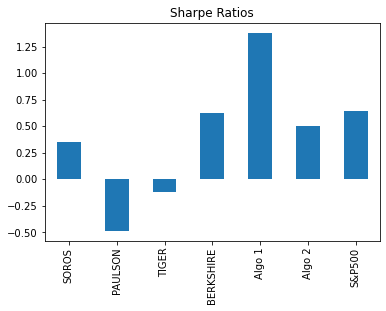

In [25]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

_Algo 1 performed better than all others. Berkshire from Whales performed better than market and others, but not Algo 1. In other cases, Market did well. It is hard to conclude anything on the algorithm. Managers might have been, because the data (number of the portfolios) is not wide enough._  

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [11]:
# Reading data from 1st stock
goog_path=Path("./Resources/goog_historical.csv")
goog_df=pd.read_csv(goog_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_df.sort_index(ascending=True,inplace=True)
goog_df.drop(["Symbol"],axis="columns",inplace=True)
goog_df.columns=["Google"]
goog_df


Google
Trade DATE         
2018-05-11  1098.26
2018-05-14  1100.20
2018-05-15  1079.23
2018-05-16  1081.77
2018-05-17  1078.59
...             ...
2019-05-03  1185.40
2019-05-06  1189.39
2019-05-07  1174.10
2019-05-08  1166.27
2019-05-09  1162.38

[250 rows x 1 columns]

In [15]:
# Reading data from 2nd stock

aapl_path=Path("./Resources/aapl_historical.csv")
aapl_df=pd.read_csv(aapl_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_df.sort_index(ascending=True,inplace=True)
aapl_df.drop(["Symbol"],axis="columns",inplace=True)
aapl_df.columns=["Apple"]
aapl_df  

Apple
Trade DATE        
2018-05-11  188.59
2018-05-14  188.15
2018-05-15  186.44
2018-05-16  188.18
2018-05-17  186.99
...            ...
2019-05-03  211.75
2019-05-06  208.48
2019-05-07  202.86
2019-05-08  202.90
2019-05-09  200.72

[250 rows x 1 columns]

In [14]:
# Reading data from 3rd stock
cost_path=Path("./Resources/cost_historical.csv")
cost_df=pd.read_csv(cost_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_df.sort_index(ascending=True,inplace=True)
cost_df.drop(["Symbol"],axis="columns",inplace=True)
cost_df.columns=["Costco"]
cost_df 

Costco
Trade DATE        
2018-05-11  195.76
2018-05-14  195.88
2018-05-15  195.48
2018-05-16  198.71
2018-05-17  199.60
...            ...
2019-05-03  244.62
2019-05-06  244.23
2019-05-07  240.18
2019-05-08  241.34
2019-05-09  243.47

[250 rows x 1 columns]

In [29]:
# Combine all stocks in a single DataFrame
new_portfolio_df=pd.concat([goog_df,aapl_df,cost_df],axis=1,join="inner")
new_portfolio_df

Google   Apple  Costco
Trade DATE                         
2018-05-11  1098.26  188.59  195.76
2018-05-14  1100.20  188.15  195.88
2018-05-15  1079.23  186.44  195.48
2018-05-16  1081.77  188.18  198.71
2018-05-17  1078.59  186.99  199.60
...             ...     ...     ...
2019-05-03  1185.40  211.75  244.62
2019-05-06  1189.39  208.48  244.23
2019-05-07  1174.10  202.86  240.18
2019-05-08  1166.27  202.90  241.34
2019-05-09  1162.38  200.72  243.47

[250 rows x 3 columns]

In [30]:
# Reset Date index
#Achived at the cleaning stage

In [31]:
# Reorganize portfolio data by having a column per symbol
#Achived at the cleaning stage

In [32]:
# Calculate daily returns
new_portfolio_returns=new_portfolio_df.pct_change()
# Drop NAs
new_portfolio_returns.dropna(inplace=True)
# Display sample data
new_portfolio_returns

Google     Apple    Costco
Trade DATE                              
2018-05-14  0.001766 -0.002333  0.000613
2018-05-15 -0.019060 -0.009088 -0.002042
2018-05-16  0.002354  0.009333  0.016523
2018-05-17 -0.002940 -0.006324  0.004479
2018-05-18 -0.011339 -0.003637 -0.003206
...              ...       ...       ...
2019-05-03  0.019602  0.012431  0.007953
2019-05-06  0.003366 -0.015443 -0.001594
2019-05-07 -0.012855 -0.026957 -0.016583
2019-05-08 -0.006669  0.000197  0.004830
2019-05-09 -0.003335 -0.010744  0.008826

[249 rows x 3 columns]

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [33]:
# Set weights
weights = [1/3, 1/3, 1/3]
new_portfolio_WA=new_portfolio_returns.dot(weights)
# Calculate portfolio return
new_portfolio_WA

# Display sample data


Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
                ...   
2019-05-03    0.013329
2019-05-06   -0.004557
2019-05-07   -0.018798
2019-05-08   -0.000547
2019-05-09   -0.001751
Length: 249, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [34]:
# Join your returns DataFrame to the original returns DataFrame

compendia_df=pd.concat([combined_df,new_portfolio_returns],axis="columns",join="inner")
compendia_df

SOROS   PAULSON     TIGER  BERKSHIRE    Algo 1    Algo 2  \
2018-05-14  0.000000  0.000000  0.000000   0.000000  0.000915  0.001635   
2018-05-15 -0.000726 -0.001409 -0.003189  -0.014606 -0.001135 -0.001139   
2018-05-16  0.008637  0.006244  0.005480   0.004310 -0.002326  0.003341   
2018-05-17 -0.001955  0.002524 -0.006267  -0.005140 -0.006949  0.005205   
2018-05-18 -0.004357 -0.002672 -0.012832  -0.002212  0.002557 -0.002496   
...              ...       ...       ...        ...       ...       ...   
2019-04-16  0.002699  0.000388 -0.000831   0.000837 -0.006945  0.002899   
2019-04-17 -0.002897 -0.006467 -0.004409   0.003222 -0.010301 -0.005228   
2019-04-18  0.001448  0.001222  0.000582   0.001916 -0.000588 -0.001229   
2019-04-22 -0.002586 -0.007333 -0.003640  -0.001088  0.000677 -0.001936   
2019-04-23  0.007167  0.003485  0.006472   0.013278  0.004969  0.009622   

              S&P500    Google     Apple    Costco  
2018-05-14  0.000884  0.001766 -0.002333  0.000613  
2018-05-15 -0.006842 -0.019060 -0.009088 -0.002042  
2018-05-16  0.004061  0.002354  0.009333  0.016523  
2018-05-17 -0.000856 -0.002940 -0.006324  0.004479  
2018-05-18 -0.002632 -0.011339 -0.003637 -0.003206  
...              ...       ...       ...       ...  
2019-04-16  0.000509  0.004938  0.000100 -0.004019  
2019-04-17 -0.002274  0.007505  0.019473  0.000897  
2019-04-18  0.001579  0.000024  0.003594  0.001018  
2019-04-22  0.001012  0.010086  0.003287 -0.009723  
2019-04-23  0.008841  0.012580  0.014423  0.008874  

[237 rows x 10 columns]

In [35]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
compendia_df.dropna(inplace=True)
compendia_df.describe()

SOROS     PAULSON       TIGER   BERKSHIRE      Algo 1      Algo 2  \
count  237.000000  237.000000  237.000000  237.000000  237.000000  237.000000   
mean     0.000251    0.000120   -0.000954    0.000157    0.001080    0.000045   
std      0.009240    0.007353    0.014648    0.015569    0.008423    0.008791   
min     -0.029343   -0.032099   -0.139820   -0.053816   -0.026095   -0.031953   
25%     -0.003994   -0.004303   -0.006597   -0.006760   -0.003196   -0.003643   
50%      0.000753    0.000000    0.000000    0.000983    0.000214    0.000494   
75%      0.004653    0.004447    0.006181    0.007532    0.003659    0.004898   
max      0.042977    0.029338    0.054425    0.061341    0.050735    0.030822   

           S&P500      Google       Apple      Costco  
count  237.000000  237.000000  237.000000  237.000000  
mean     0.000353    0.000724    0.000578    0.001047  
std      0.009578    0.016095    0.018706    0.013357  
min     -0.032864   -0.050579   -0.099607   -0.085868  
25%     -0.003136   -0.007150   -0.007926   -0.004028  
50%      0.000709    0.000122    0.001740    0.002780  
75%      0.004923    0.009888    0.009194    0.007123  
max      0.049594    0.064780    0.070422    0.050879

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [36]:
# Calculate the annualized `std`
compendia_std=compendia_df.std
compendia_annualised_std = compendia_std()*np.sqrt(252)
compendia_annualised_std

SOROS        0.146675
PAULSON      0.116732
TIGER        0.232531
BERKSHIRE    0.247155
Algo 1       0.133704
Algo 2       0.139556
S&P500       0.152054
Google       0.255500
Apple        0.296951
Costco       0.212034
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Combined rolling Std. of Whale, Algorithmic,S&P 500,Google, Apple & Costco  Returns'}>

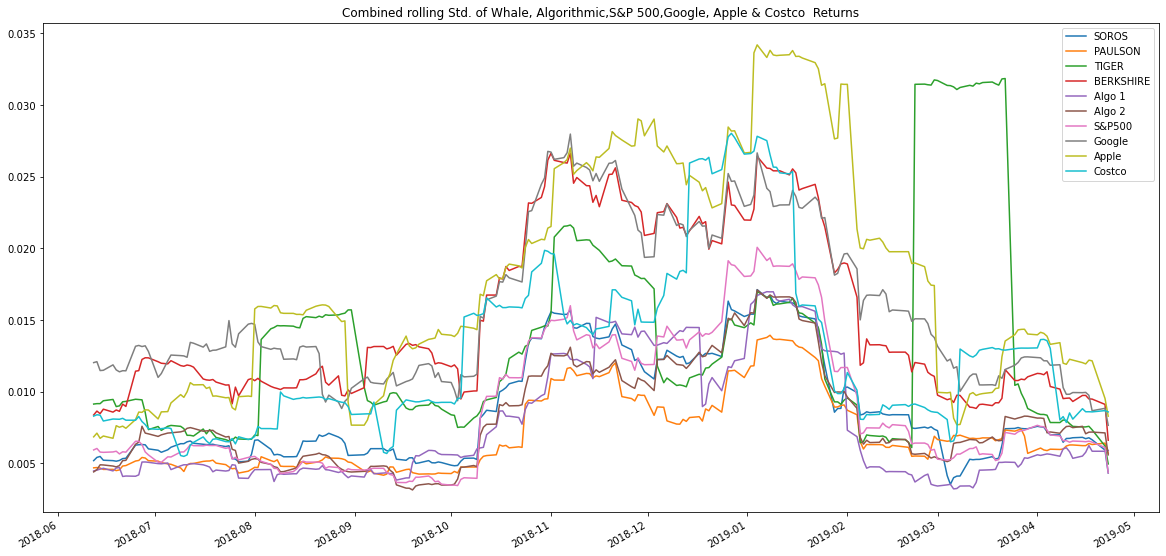

In [37]:
# Calculate rolling standard deviation
compendia_rolling_std=compendia_df.rolling(window=21,center=False, axis=0).std()


# Plot rolling standard deviation
compendia_rolling_std.plot(figsize=(20,10),title="Combined rolling Std. of Whale, Algorithmic,S&P 500,Google, Apple & Costco  Returns")

### Calculate and plot the correlation

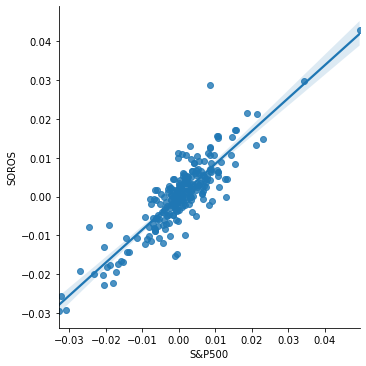

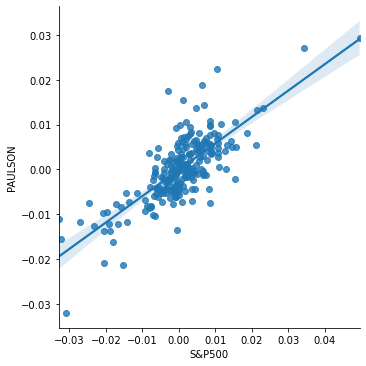

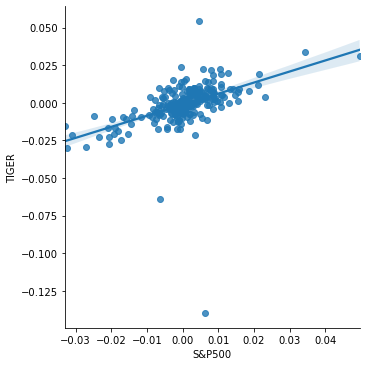

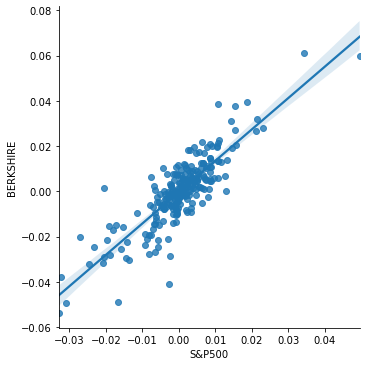

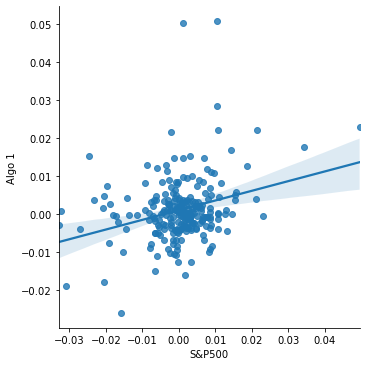

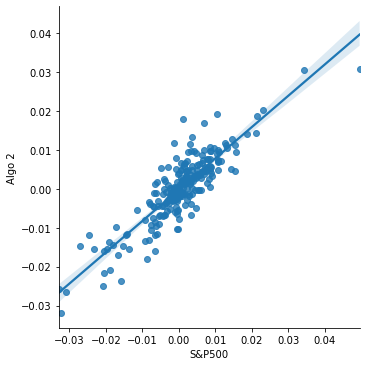

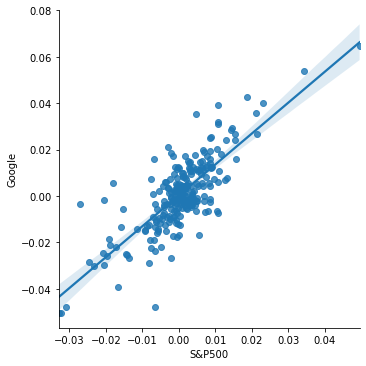

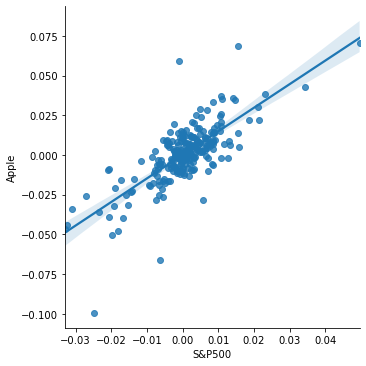

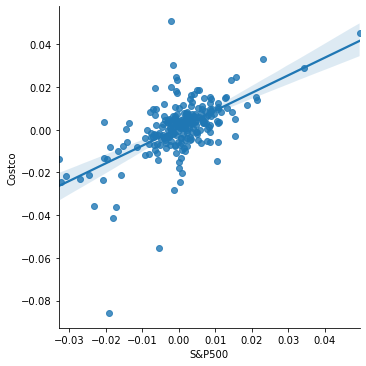

In [38]:
# Calculate and plot the correlation
new_correlation = compendia_df.corr
sns.lmplot(x="S&P500",y="SOROS",data=compendia_df,fit_reg=True)
sns.lmplot(x="S&P500",y="PAULSON",data=compendia_df,fit_reg=True)
sns.lmplot(x="S&P500",y="TIGER",data=compendia_df,fit_reg=True)
sns.lmplot(x="S&P500",y="BERKSHIRE",data=compendia_df,fit_reg=True)
sns.lmplot(x="S&P500",y="Algo 1",data=compendia_df,fit_reg=True)
sns.lmplot(x="S&P500",y="Algo 2",data=compendia_df,fit_reg=True)
sns.lmplot(x="S&P500",y="Google",data=compendia_df,fit_reg=True)
sns.lmplot(x="S&P500",y="Apple",data=compendia_df,fit_reg=True)
sns.lmplot(x="S&P500",y="Costco",data=compendia_df,fit_reg=True)


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [39]:
# Calculate and plot Beta
weights=(.1,.1,.1,.1,.1,.1,.1,.1,.1,.1)
new_compendia_ret=compendia_df.dot(weights)
new_compendia_ret
new_compendia_60roll_ret=new_compendia_ret.rolling(window=60,center=False,axis=0).sum()
new_compendia_60roll_ret=new_compendia_60roll_ret.dropna()
variance_sp500=compendia_df["S&P500"].var()
variance_sp500
covariance_sp500_portfolio=compendia_df["SOROS"].cov(compendia_df["S&P500"])
beta_sp500_portfolio=new_compendia_60roll_ret/variance_sp500
beta_sp500_portfolio

2018-08-07     572.899661
2018-08-08     576.185308
2018-08-09     617.553035
2018-08-10     500.701837
2018-08-13     505.557001
                 ...     
2019-04-16     968.287735
2019-04-17    1111.470883
2019-04-18    1102.878235
2019-04-22    1081.759801
2019-04-23    1054.226407
Length: 178, dtype: float64

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [40]:
# Calculate Annualzied Sharpe Ratios

compendia_std=compendia_df.std()
compendia_std

compendia_sharpe_ratio=(compendia_df.mean()*252)/(compendia_std*np.sqrt(252))
compendia_sharpe_ratio


SOROS        0.430713
PAULSON      0.258738
TIGER       -1.034216
BERKSHIRE    0.159756
Algo 1       2.035665
Algo 2       0.080607
S&P500       0.584820
Google       0.714034
Apple        0.490850
Costco       1.244419
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios Combined Portfolio of Whale, Algorithmic,S&P 500,Google, Apple & Costco  Returns'}>

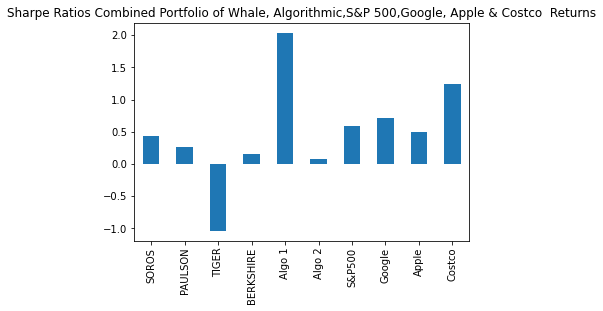

In [41]:
# Visualize the sharpe ratios as a bar plot
compendia_sharpe_ratio.plot.bar(title="Sharpe Ratios Combined Portfolio of Whale, Algorithmic,S&P 500,Google, Apple & Costco  Returns")

### How does your portfolio do?

Write your answer here!

_Sharpe ratio should be higher than one for reasonable return an expected returns. 
So, TIGER, which is below zero is not a predictable portfolio.
Other than Algo ! and Costco, the portfolios’’ Sharpe Ratio is not good.
Algo’s near to 2 sharp Ratio is a indicator of good stability in
income
e._